# Regressão Logistica do Zero

<p align="center"> 
 <img src="https://raw.githubusercontent.com/pedrohrafael/pedrohrafael/main/img/logistic-regression.png" alt="MarineGEO circle logo" style="height:65%; width:65%;"/>
</p>

## Objetivo

Demonstrando a construção da [Regressão Logistica](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica), sendo este um algoritmo aplicado a problemas de classificação. 

As bases principais utilizadas para definir os cálculos das funções do algoritmo são:
- [CS229 Lecture Notes](https://cs229.stanford.edu/lectures-spring2022/main_notes.pdf) por [Andrew Ng](https://www.andrewng.org/).
- [Probability for Machine Learning - Discover How To Harness Uncertainty With Python](https://dokumen.pub/probability-for-machine-learning-discover-how-to-harness-uncertainty-with-python-v19nbsped.html) por Jason Brownlee
- [Machine Learning - A Probabilistic Perspective](http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf) por Kevin P. Murphy

## Construindo o algoritmo

A __regressão logística__ pode ser usada para vários problemas de classificação binária, como detecção de spam, previsão de diabetes, se cliente vai comprar um produto ou vai deixar de ser um cliente, etc. Se trata de um __algoritmo linear__, assim como a [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear), porém suas saídas são probabilidades dos eventos acontecerem, sendo essas probabilidades transformadas em valores geralmente binários (0 ou 1). 

Para construir o algoritmo da regressão logistica será necessário definir parametros de iniciais, uma __função de custo__ e uma __função de otimização__ que irá de for iterativa, atualizar os parametros até a convergencia. O algoritmo usa da __função logística sigmoide__ para modelar a probabilidade dos eventos estimados.

### __Sigmoide__

[Sigmoid](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_log%C3%ADstica) é uma função matemática que transforma qualquer número real em uma probabilidade entre 0 e 1. Graficamente, a sigmoide representa uma curva em forma de S, indicando que quanto mais `z` se aproxima de infinito positivo, mais o valor previsto se aproxima de 1 e quanto mais `z` se aproximar ao infinito negativo, mais o valor previsto será aproximado de 0.

A função logistica é definida como:

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

Representada graficamente:

<p style="text-align:center;"><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/sigmoid.png" alt="drawing" style="width:250px;"/></p>

Onde:
- __σ(z)__ = Estimativa de probabilidade (p), sendo uma saída entre 0 e 1
- __z__ = Entrada para a função (estimativa do algoritmo, por exemplo βx+α)
- __e__ = [Número de Euler](https://pt.wikipedia.org/wiki/E_(constante_matem%C3%A1tica)\), base dos logaritmos naturais

Como __limite de decisão__ para mapear as probabilidades (p) em classes discretas binárias (0 ou 1) consideramos o valor de __0.5__, conforme a regra abaixo:

$$
p ≥ 0.5, classe=1 \\
p < 0.5, classe=0
$$

In [1]:
# Definindo a função sigmoide em python
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### __Função de custo/perda__

As funções de perda são usadas para determinar o custo (também conhecido como "erro") entre a saída do algoritmo `ŷ` e o valor alvo real `y`, ou seja, a função de perda gera uma métrica que indica o quão longe as estimativas geradas estão dos valores reais. Como o objetivo é ser o mais assertivo quanto possível, é necessário reduzir os custos gradativamente e isso é possível ser feito utilizando uma função de otimização.

Apesar de a Regressão Logistica ser um algoritmo linear, não devemos utilizar a mesma função de custo [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (Mean Squared Error) que usamos para a Regressão Linear. Pulando a parte explicativa matemática¹, de maneira resumida o motivo de não usar a MSE para regressão logistica é que a função de previsão é não linear, devido à transformação sigmóide, e por isso é utilizada uma função de custo mais adequada, a __Entropia Cruzada binária__ ou __Log Loss__, que é dada pela função abaixo:

$$ J(\theta) = -\frac{1}{m}\sum_{n=1}^m[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$$

[1] [Probability for Machine Learning - Discover How To Harness Uncertainty With Python, página 102](https://dokumen.pub/probability-for-machine-learning-discover-how-to-harness-uncertainty-with-python-v19nbsped.html)

In [2]:
# Definindo a função de custo em python
def log_loss(y, yhat):
    m = len(y)
    loss = (-1 / m) * np.sum((y.T.dot(np.log(yhat))) + ((1 - y).T.dot(np.log(1 - yhat))))
    return loss

### Função de otimização

Como o objetivo é minimizar a função de custo, será necessário ajustar os parametros (pesos) até alcançar a convergencia. Esta otimização dos parametros pode ser obtida através da derivada da função de custo em relação a cada peso. Como função de otimização, será aplicado o __gradiente descendente__ (descida do gradiente).

Os gradientes são o vetor da derivada de 1ª ordem da função custo. 
Ao diferenciar a função de custo, temos a expressão do gradiente que é dado por:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})x_j^{(i)}$$

Para ajustar o parâmetro __θ__:

$$ \theta_j^{new}=\theta_j^{old}-\alpha\frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})x_j^{(i)}$$

Onde __α__ é a taxa de aprendizado (learning rate).

Para mais detalhes sobre a derivação da função de custo da regressão logistica, indico o artigo [The Derivative of Cost Function for Logistic Regression](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)

In [3]:
# Definindo função de otimização em python
def gradient_descent(X, y, theta, yhat, learning_rate):  
    m = len(y)
    theta -= learning_rate * ((1 / m) * (np.dot(X.T, (yhat - y))))
    return theta

---

### Regressão Logistica

Para melhor a aplicação das funções, vou reescreve-las utilizando programação orientada a objetos para criar uma classe que irá representar o algoritmo.

In [5]:
class LogisticRegression:
    """
    Classificador de regressão logística.
    Parametros
    ----------
    n_iterations: int, default=500
        Número máximo de iterações para convergir.
    learning_rate float, default=0.01
        Taxa de aprendizado.
    ----------
    """
    # Inicializando a função com os parametros learning_rate e n_iterations
    def __init__(self, learning_rate=0.01, n_iterations=500):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    # Implementando a função logistica
    def __sigmoid(self, z):
        np.seterr(all='ignore')
        return 1 / (1 + np.exp(-z))
    
    # Implementando a função de custo: Entropia Cruzada Binária/Log Loss
    def __log_loss(self, y, yhat):
        logloss = (-1 / self.__m) * np.sum(y.T.dot(np.log(yhat)) + (1 - y).T.dot(np.log(1 - yhat)))
        return logloss
    
    # Implementando a função de otimização: Gradiente Descendente
    def __gradient_descent(self, X, y, yhat, theta):
        theta -= self.learning_rate * (1 / self.__m * X.T.dot((yhat - y)))
        return theta
    
    # Definindo a função de ajuste do modelo: processo de treinamento
    def fit(self, X, y, class_weight=None):
        """
        Ajuste o modelo de acordo com os dados de treinamento fornecidos.
        """
        self.classes_ = np.unique(y)
        self.__m = np.float64(X.shape[0])
        self.losses = list()
        theta = np.zeros((X.shape[1]))
        for _ in range(self.n_iterations):
            z = np.dot(X, theta)
            yhat = self.__sigmoid(z)
            loss = self.__log_loss(y, yhat)
            theta = self.__gradient_descent(X, y, yhat, theta)
            self.losses.append(loss)
        self.theta = theta
    
    # Definindo a função de estimador do modelo
    def predict(self, X):
        """
        Prever rótulos de classe para amostras em X.
        """
        z = np.dot(X, self.theta)
        proba = self.__sigmoid(z)
        return np.asarray([1 if p > 0.5 else 0 for p in proba])

O código acima está disponível em [../src/LogisticRegression.py](https://github.com/pedrohrafael/data-science/blob/main/building-logistic-regression/src/LogisticRegression.py)

#### Treinando o modelo com valores gerados por `make_classification` do sklearn para demonstrar a convergencia do modelo.

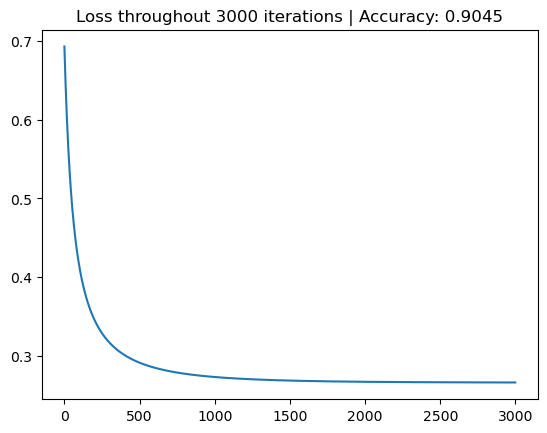

In [117]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# gerando dados
X, y = make_classification(n_samples=2000, n_features=4, random_state=42)

# split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# ajuste do modelo e previsao
n_iterations = 3000
lr = LogisticRegression(n_iterations=n_iterations)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Redução da perda por iterações e acuracia do modelo
plt.plot(lr.losses);
plt.title("Loss throughout {} iterations | Accuracy: {}".format(n_iterations, accuracy_score(y_test, y_pred).round(4)));